# Imports and installtion

In [33]:
# !  pip install numpy
# !  pip install pandas
# !  pip install xlrd
# !  pip install matplotlib
# !  pip install seaborn
# !  pip install ipywidgets
# !  pip install plotly
# !  pip install cufflinks
# !  pip install -U scikit-learn
# !  pip install yellowbrick
# !  pip install graphviz 
# ! pip install pmdarima
# ! pip install statsmodels
# ! pip install prophet

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import graphviz 
import yellowbrick
import sklearn
from prophet import Prophet

In [3]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression , LinearRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')

# Data reading

In [5]:
sheetName = 'יהודים'

In [6]:
private_name_col_name = "Year / Private Name"

In [7]:
prev_name_col_name = "שם פרטי"

In [8]:
sum_column_index = 1

In [9]:
headre_num = 12

In [10]:
sum_col_name ="sum between 1948-2021"

In [11]:
data_path ='Private_Names.xlsx'

In [12]:
predicting = 5 

In [13]:
data = pd.read_excel(data_path,sheet_name=sheetName,header=headre_num)

In [14]:
prev_sum_col_name = data.iloc[:,sum_column_index].name

In [15]:
data.rename(columns={prev_sum_col_name: sum_col_name, prev_name_col_name : private_name_col_name }, inplace=True)

## Clean and prepare Data

In [16]:
clean_data = data.drop(columns =[sum_col_name], axis=1)

In [17]:
clean_data.head(2)

,Year / Private Name,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,אבא,.,6,..,..,8,..,5,..,..,...,..,..,..,..,..,..,..,..,..,..
1,אבי,34,49,53,79,92,80,89,97,105,...,9,10,10,11,9,10,..,..,13,10


In [18]:
clean_data = clean_data.T

In [19]:
names = clean_data.iloc[0]

In [20]:
clean_data.columns = names

In [21]:
clean_data.tail(3)

Year / Private Name,אבא,אבי,אבי-אברהם,אביאור,אביאל,אביב,אביגדור,אבידור,אבידן,אבידע,...,תומס,תומר,תור,תיאו,תיאודור,תימור,תלם,תם,תמיר,תמר
2019,..,..,.,27,222,382,33,.,..,.,...,..,119,..,7,.,..,..,6,15,..
2020,..,13,.,27,178,342,30,.,..,.,...,8,107,7,22,..,..,8,6,18,..
2021,..,10,.,32,180,376,29,.,..,.,...,7,109,6,21,6,..,6,7,30,..


In [22]:
clean_data.drop([private_name_col_name] , inplace=True , axis=0 ,errors='ignore')

In [23]:
for idx , row in clean_data.iterrows() :
    row.replace({np.nan: 0, '.': 0, '..': 2,np.inf: 0, -np.inf: 0},inplace=True)
clean_data = clean_data.astype('int64')

In [24]:
clean_data.tail(3)

Year / Private Name,אבא,אבי,אבי-אברהם,אביאור,אביאל,אביב,אביגדור,אבידור,אבידן,אבידע,...,תומס,תומר,תור,תיאו,תיאודור,תימור,תלם,תם,תמיר,תמר
2019,2,2,0,27,222,382,33,0,2,0,...,2,119,2,7,0,2,2,6,15,2
2020,2,13,0,27,178,342,30,0,2,0,...,8,107,7,22,2,2,8,6,18,2
2021,2,10,0,32,180,376,29,0,2,0,...,7,109,6,21,6,2,6,7,30,2


In [25]:
clean_data.set_index(pd.DatetimeIndex(clean_data.index).to_period('Y'))

Year / Private Name,אבא,אבי,אבי-אברהם,אביאור,אביאל,אביב,אביגדור,אבידור,אבידן,אבידע,...,תומס,תומר,תור,תיאו,תיאודור,תימור,תלם,תם,תמיר,תמר
1970,0,34,0,0,2,2,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970,6,49,0,0,2,2,16,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1970,2,53,0,0,2,2,23,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1970,2,79,0,0,2,2,26,2,2,0,...,0,0,0,0,2,0,0,0,5,0
1970,8,92,0,0,2,8,23,2,2,0,...,0,2,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,2,10,0,25,274,297,23,2,2,0,...,5,146,2,11,2,2,2,2,32,2
1970,2,2,0,22,231,345,23,2,8,0,...,2,120,12,6,2,5,7,5,27,2
1970,2,2,0,27,222,382,33,0,2,0,...,2,119,2,7,0,2,2,6,15,2
1970,2,13,0,27,178,342,30,0,2,0,...,8,107,7,22,2,2,8,6,18,2


In [26]:
x = clean_data.index.values

In [27]:
for i in range(predicting):
    clean_data.index = clean_data.index + 1  
clean_data.iloc[0-predicting:] = np.zeros(len(clean_data.columns))

In [28]:
clean_data.tail(6)

Year / Private Name,אבא,אבי,אבי-אברהם,אביאור,אביאל,אביב,אביגדור,אבידור,אבידן,אבידע,...,תומס,תומר,תור,תיאו,תיאודור,תימור,תלם,תם,תמיר,תמר
2021,2,9,0,31,297,264,14,2,5,2,...,2,178,2,8,0,2,2,2,40,2
2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.linear_model import LinearRegression

for i in range(len(clean_data.columns)):
    model = LinearRegression()
    count = clean_data.iloc[:, i].values
    years = clean_data.index.values
    model.fit(years[:0-predicting].reshape(-1, 1), count[:0-predicting].reshape(-1, 1))
    predicted_values = model.predict(years[0-predicting:].reshape(-1, 1)).astype("int")
    predicted_values = np.clip(predicted_values, 0, None)
    clean_data.iloc[0-predicting:, i] = predicted_values.flatten()

In [30]:
clean_data.tail(predicting+3) 

Year / Private Name,אבא,אבי,אבי-אברהם,אביאור,אביאל,אביב,אביגדור,אבידור,אבידן,אבידע,...,תומס,תומר,תור,תיאו,תיאודור,תימור,תלם,תם,תמיר,תמר
2019,2,10,0,18,260,355,21,2,2,0,...,2,194,2,6,2,2,2,2,57,0
2020,2,11,0,19,314,280,17,2,9,0,...,2,195,2,7,2,2,0,6,51,2
2021,2,9,0,31,297,264,14,2,5,2,...,2,178,2,8,0,2,2,2,40,2
2022,2,53,0,14,181,333,8,1,7,0,...,2,509,2,2,0,3,1,15,137,2
2023,2,51,0,15,185,338,7,1,7,0,...,2,516,2,2,0,3,1,15,138,2
2024,2,49,0,15,188,343,7,1,7,0,...,2,523,2,2,0,3,1,16,140,2
2025,2,47,0,15,191,349,7,1,7,0,...,2,530,2,2,0,3,1,16,141,2
2026,2,44,0,16,195,354,7,1,7,0,...,2,537,2,2,0,3,1,16,142,2


In [31]:
clean_data.to_excel("Predicted_Names.xlsx",index=True)

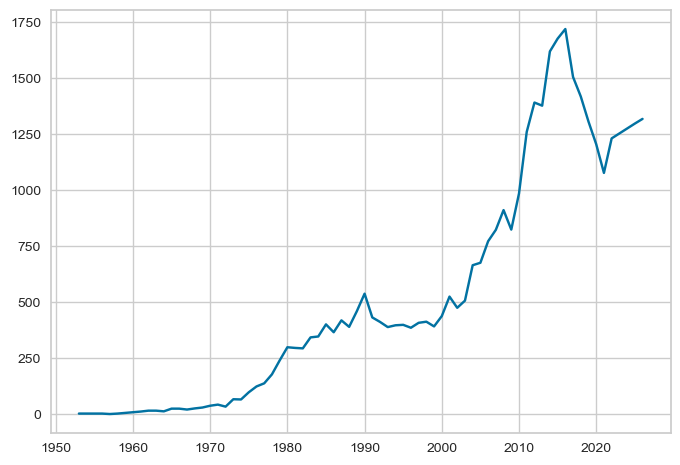

In [32]:
plt.plot(clean_data['איתי'])